In [17]:
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.8.0


In [18]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' #coco is a data set comon object n context
f_model = 'frozen_inference_graph.pb' 

In [19]:
model = cv2.dnn_DetectionModel(f_model,config_file)

In [20]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n')

In [21]:
print(len(classLabels))

624


In [22]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 00000292B483BA50>

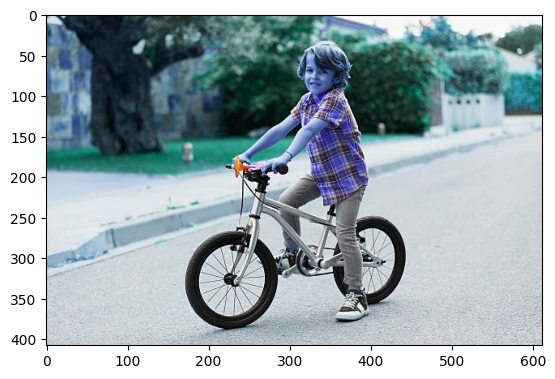

In [23]:
img = cv2.imread('boy.jpg')
plt.imshow(img)

In [24]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)

In [25]:
print(ClassIndex)

[1 2 1]


In [26]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font, fontScale = font_scale, color = (0,255,0), thickness=3)

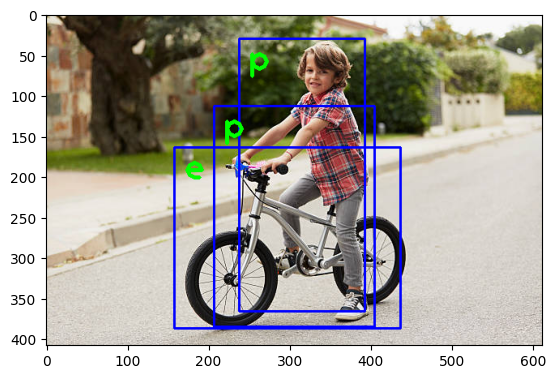

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
# for object detection using video capture


cap = cv2.VideoCapture('video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes,(255, 0, 0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font, fontScale = font_scale, color = (0,255,0), thickness=3)
    
    cv2.imshow('Obeject detection', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[6 3]


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
